# The Sparks Foundation
# Data Science and Business Analytics Intern
# Author- Samrudhi Prashant Baldota

### Task 1: Prediction using Supervised Machine Learning

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df=pd.read_csv("/Users/HP/Desktop/student_scores - student_scores.csv")

In [3]:
# printing the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#printing the first 5 values of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#printing the last 5 values of dataset
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Cleaning the Data

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Dropna is used to remove any null valued rows.Here the 0 indicates there aren't any null values present .

## Visualising Data

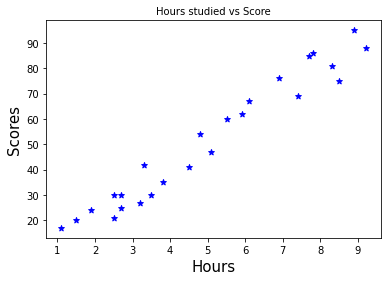

In [9]:
##ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(df.Hours,df.Scores,color='blue',marker='*')
plt.show()

### This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring

# Preparing Data and splitting into train and test sets.

In [20]:
x=df[['Hours']]
y=df[['Scores']]

In [21]:
x


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [22]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.3)

In [24]:
x_train

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2
18,6.1
4,3.5
9,2.7


In [25]:
y_train

,Scores
23,76
14,17
1,47
10,85
13,42
8,81
6,88
18,67
4,30
9,25


## Training the model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
print("B0 =",regressor.intercept_,"\nB1 =",regressor.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = [2.37081538] 
B1 = [[9.78856669]]


In [31]:
##plotting the REGRESSION LINE---
Y0 = regressor.intercept_ + regressor.coef_*x_train

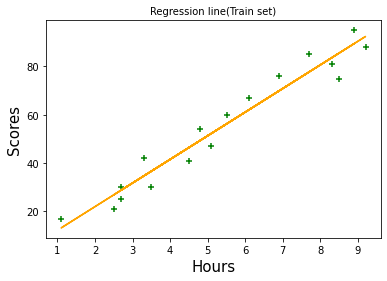

In [32]:
##plotting on train data
plt.scatter(x_train,y_train,color='green',marker='+')
plt.plot(x_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

## Testing the data

In [33]:
y_pred=regressor.predict(x_test)

In [34]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [35]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24
24,86


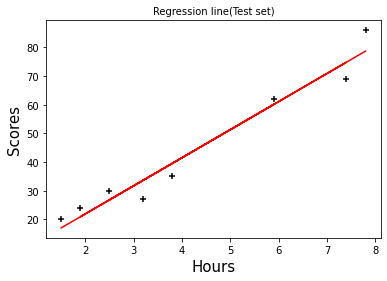

In [36]:
#plotting line on test data
plt.plot(x_test,y_pred,color='red')
plt.scatter(x_test,y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## ACCURACY OF THE MODEL

In [47]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9568211104435257

### Above 95% percentage indicates that above fitted Model is a GOOD MODEL.

## Predicting the Error

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  22.96509721270043
Root Mean Squared Error =  4.792191274636315
Mean Absolute Error     =  4.792191274636315


# Predicting an score for a student studying 9.25 hrs a day.

In [52]:
topredict=[['9.25']]
topredictdf=pd.DataFrame(topredict,columns=['Hours'])
topredictdf

,Hours
0,9.25


In [53]:
y_pred=regressor.predict(topredictdf)


In [54]:
y_pred

array([[92.91505723]])

# Conclusion


### From the above result we can say that if a studied for 9.25 then student will secured 92.91 marks. Task 1 Completed